In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import dollarBar as db

https://www.thepythoncorner.com/2018/04/how-to-make-your-code-faster-by-using-a-cache-in-python/?source=post_page---------------------------

https://cachetools.readthedocs.io/en/stable/

+ numba을 이용한 GIL 없이 멀티쓰레드
https://wikidocs.net/11729

## Dollar Bar

In [2]:
df = pd.read_csv('test.csv',index_col='date_time')
df.index = pd.to_datetime(df.index)
df.head()

,price,volume,buy,sell
date_time,,,,
2018-11-21 09:00:00,266.200012,1.0,0.0,1.0
2018-11-21 09:00:00,266.200012,1.0,0.0,1.0
2018-11-21 09:00:00,266.250000,21.0,21.0,0.0
2018-11-21 09:00:00,266.299988,1.0,1.0,0.0
2018-11-21 09:00:00,266.350006,2.0,2.0,0.0


## Dollar Bar

```python
def dollarBar(
    df,
    interval='W',
    col_price='close',
    col_volume='volume',
    col_dollar='dollar',
    index_name='timestamp',
    exp_num_bar=20
    ):
```

In [3]:
import itertools as it

comb = list(it.product(['D','W','M'], [10,15,20,25,30,50,100,500,1000]) )
for intv,expt in comb:
    print('dollar_'+intv+'_'+str(expt)+'.csv')
    dollar = db.dollarBar(df,interval=intv,col_price='price',exp_num_bar=expt)
    dollar.to_csv('dollar_'+intv+'_'+str(expt)+'.csv')

dollar_D_10.csv



dollar_D_15.csv



dollar_D_20.csv



dollar_D_25.csv



dollar_D_30.csv



dollar_D_50.csv



dollar_D_100.csv



dollar_D_500.csv



dollar_D_1000.csv



dollar_W_10.csv



dollar_W_15.csv



dollar_W_20.csv



dollar_W_25.csv



dollar_W_30.csv



dollar_W_50.csv



dollar_W_100.csv



dollar_W_500.csv



dollar_W_1000.csv



dollar_M_10.csv



dollar_M_15.csv



dollar_M_20.csv



dollar_M_25.csv



dollar_M_30.csv



dollar_M_50.csv



dollar_M_100.csv



dollar_M_500.csv



dollar_M_1000.csv


## Stats

intv|exp|autocorr
---|---|---
D|10|0.013079542812187579
D|15|0.0003928899032875256
D|20|0.002143099567238447
D|25|0.0024074720318248066
D|30|-0.002887386796830228
D|50|0.00798156474373467
D|100|-0.008409604757603164
D|500|-0.04409949888909549
D|1000|-0.04412959954825885
W|10|-0.08381846373411553
W|15|-0.05060969260492926
W|20|-0.004235249983090609
W|25|0.009405708061156846
W|30|-0.021029382196843083
W|50|-0.0029638249098366456
W|100|0.01200695869612243
W|500|-0.007252212932578933
W|1000|-0.024822309412402495
M|10|0.10822813042135303
M|15|-0.06754195681605213
M|20|-0.05209924112368437
M|25|-0.0877813071883643
M|30|-0.06225403897686553
M|50|-0.06613450705704751
M|100|0.00950371057477676
M|500|-0.0066606460674210975
M|1000|0.004051824675610246

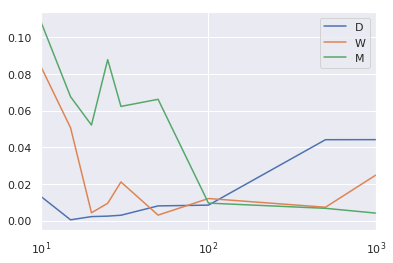

In [5]:
import itertools as it
comb = list(it.product(['D','W','M'], [10,15,20,25,30,50,100,500,1000]) )
df_stat = pd.DataFrame()
for intv,expt in comb:
    name = 'dollar_'+intv+'_'+str(expt)+'.csv'
    t_df = pd.read_csv(name,index_col='timestamp')
    #print(name)
   # print(str(t_df.index.size))    
    t_df['return'] = t_df['price'].pct_change()
    t_df = t_df.dropna()    
    #print( str(intv)+'|'+str(expt) +'|'+str(t_df['return'].autocorr(lag=1))  )
    df_stat.loc[expt,intv] = np.abs(t_df['return'].autocorr(lag=1))
df_stat.plot(logx=True)

## Dynamic Threshold Dollar ?